![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [89]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

 Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

 Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [91]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB
(7565, 7)


In [92]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

Jadvalimiz jami `7565` ta qator va` 6` ta ustundan iborat ekan, barchasida ma'lumot bor.

Hozircha `location` ustunini tashlab yuboramiz, chunki ma'lumotlarimiz kamligi bu bo'yicha noaniq prognizga olib keladi.

`size - object` va `price - object` ustunlari sonli ustunlar bo'lishiga qaramasdan ular object formatida chiqyabdi, bu ustunlarni tekshirib, sonli qiymatga aylantiramiz. Hamda `district - object` ni ham tekshiramiz.

In [93]:
df = df.drop('location', axis=1)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000


Endi `'size'` ustunini tekshirib, `object`dan `float64` formatga o'giramiz

In [94]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

Bu ustunda 1 donagina `'Площадьземли:1сот'` degan noodatiy qiymat mavjud ekan, uni qayta nomlab `NaN` qiymatga aylantrb olamiz.

In [95]:
# Replace the string 'Площадьземли:1сот' with NaN
df['size'] = df['size'].replace('Площадьземли:1сот', np.nan)

# Convert column 'size' to numeric data type
df['size'] = pd.to_numeric(df['size'])

# Print the resulting DataFrame
print(df.isnull().sum())
print(df)

district      0
rooms         0
size          1
level         0
max_levels    0
price         0
dtype: int64
               district  rooms  size  level  max_levels  price
0          Юнусабадский      3  57.0      4           4  52000
1         Яккасарайский      2  52.0      4           5  56000
2          Чиланзарский      2  42.0      4           4  37000
3          Чиланзарский      3  65.0      1           4  49500
4          Чиланзарский      3  70.0      3           5  55000
...                 ...    ...   ...    ...         ...    ...
7560        Яшнободский      1  38.0      5           5  24500
7561        Яшнободский      2  49.0      1           4  32000
7562    Шайхантахурский      2  64.0      3           9  40000
7563  Мирзо-Улугбекский      1  18.0      1           4  11000
7564       Чиланзарский      1  30.0      2           4  22914

[7565 rows x 6 columns]


Endi `'size'` ustunimizda 1 ta `nan` qiymat paydo bo'ldi, `NaN` qatorni `.dropna()` metodidan foydalanib o'chirib yuboramiz

In [96]:
df.dropna(inplace=True) # NaN qatorni o'chirib faylni o'zida saqlaymiz
print(df.isnull().sum())
print(df.shape)
df.info()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64
(7564, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 7564 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7564 non-null   object 
 1   rooms       7564 non-null   int64  
 2   size        7564 non-null   float64
 3   level       7564 non-null   int64  
 4   max_levels  7564 non-null   int64  
 5   price       7564 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 413.7+ KB


`'size'` ustunini `float64` formatiga o'tkazib oldik, bu ustun 1 ta noodatiy qiymat mavjudligi uchun ushbu qiymat joylashgan qatorni o'chirib yubordik va df `7564` ta qatordan iborat bo'lib qoldi.

Endi esa `'price'` ustunini tekshirib, uni ham `object`dan `float64` formatga o'giramiz.

In [97]:
df['price'].unique()

array(['52000', '56000', '37000', '49500', '55000', '25500', '21200',
       '20000', '26200', '22200', '24200', '30200', '22500', '32500',
       '45000', '47000', '49900', '76000', '65000', '47500', '30000',
       '32000', '44000', '56500', '35000', '23500', '60500', '68000',
       '41500', '52500', '43000', '80000', '42000', '23000', '88784',
       '97000', '28500', '34500', '51000', '48000', '40000', '67000',
       '40500', '54000', '36000', '63000', '63500', '70000', '91000',
       '83000', '19765', '50000', '86000', '31500', '26500', '14500',
       '27000', '59500', '47299', '38000', '29500', '61500', '46500',
       '58400', '26000', '105000', '53500', '12500', '107000', '39414',
       '60000', '49000', '18000', '42500', '45800', '24000', '58000',
       '55500', '31000', '41000', '50500', '13071', '45188', '53000',
       '25600', '35226', '36500', '142000', '85000', '110000', '69000',
       '28900', '34000', '25000', '39000', '125000', '28000', '43500',
       '39999',

Bu ustunda ham birqancha  (nazarimda 1 ta) noodatiy qiymat(lar) mavjud ekan, ushbu qator(lar)ni ham tashlab yuboramiz.

Buning uchun esa yuqoridagidan farqli o'laroq, `'price'` ustunini numericga aylantirib undagi NaNlarni tashlab yuboramiz

In [98]:
df1=df.copy()

In [99]:
# Convert the 'price' column to numeric type; set non-numeric values to NaN
df1["price"] = pd.to_numeric(df1["price"], errors="coerce")

print(df1.isnull().sum())
df1

district       0
rooms          0
size           0
level          0
max_levels     0
price         99
dtype: int64


,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


`price` ustunida esa `99` ta string qiymatlar mavjud ekan, ularni tahlil qilamiz.

In [100]:
# Extract strings from column 'A' using regular expressions
# df1['price'].str.extract(r'([a-zA-Z]+)', expand=True)

# Print the extracted strings
# print(strings)

In [101]:
df1.dropna(inplace=True)

In [102]:
print(df1.isnull().sum())
df1

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64


,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7465 non-null   object 
 1   rooms       7465 non-null   int64  
 2   size        7465 non-null   float64
 3   level       7465 non-null   int64  
 4   max_levels  7465 non-null   int64  
 5   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 408.2+ KB


`price` ustunidagi `string` qiymatlarning ham qatori bilan tashlab yubordik va uni ham `float64` formatiga o'tkazib oldik. DataFrame endi `7465` ta qatordan iborat bo'lib qoldi.

In [104]:
df1.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


Endi esa `price` (minprice=2, maxprice=52 000 000) va `size` (minsize=1, maxsize=70000) ustunlaridagi juda katta va kichik qiymatlardan filtrlaymiz. `price`ni 10 000 dan 500 000 gacha, `size`ni esa 10 dan 500 gacha olamiz. Shunda haqiqatga to'g'riroq bo'ladi.

In [105]:
df1 = df1[df1['price']>=10000]
df1 = df1[df1['price']<=500000]
df1 = df1[df1['size']>=10]
df1 = df1[df1['size']<=500]

In [106]:
df1.describe()

,rooms,size,level,max_levels,price
count,7419.000000,7419.000000,7419.000000,7419.000000,7419.000000
mean,2.617199,72.992929,3.698746,6.031271,58629.700768
std,1.069368,36.294707,2.238770,2.608103,43415.896439
min,1.000000,14.000000,1.000000,1.000000,10000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,65.000000,3.000000,5.000000,46200.000000
75%,3.000000,85.000000,5.000000,9.000000,66477.500000
max,10.000000,456.000000,19.000000,25.000000,500000.000000


In [107]:
df1.shape

(7419, 6)

Barcha sonli qatorlarni normal holatga keltrb oldik va qatorlarimiz soni `7419` ta bo'lib qoldi.

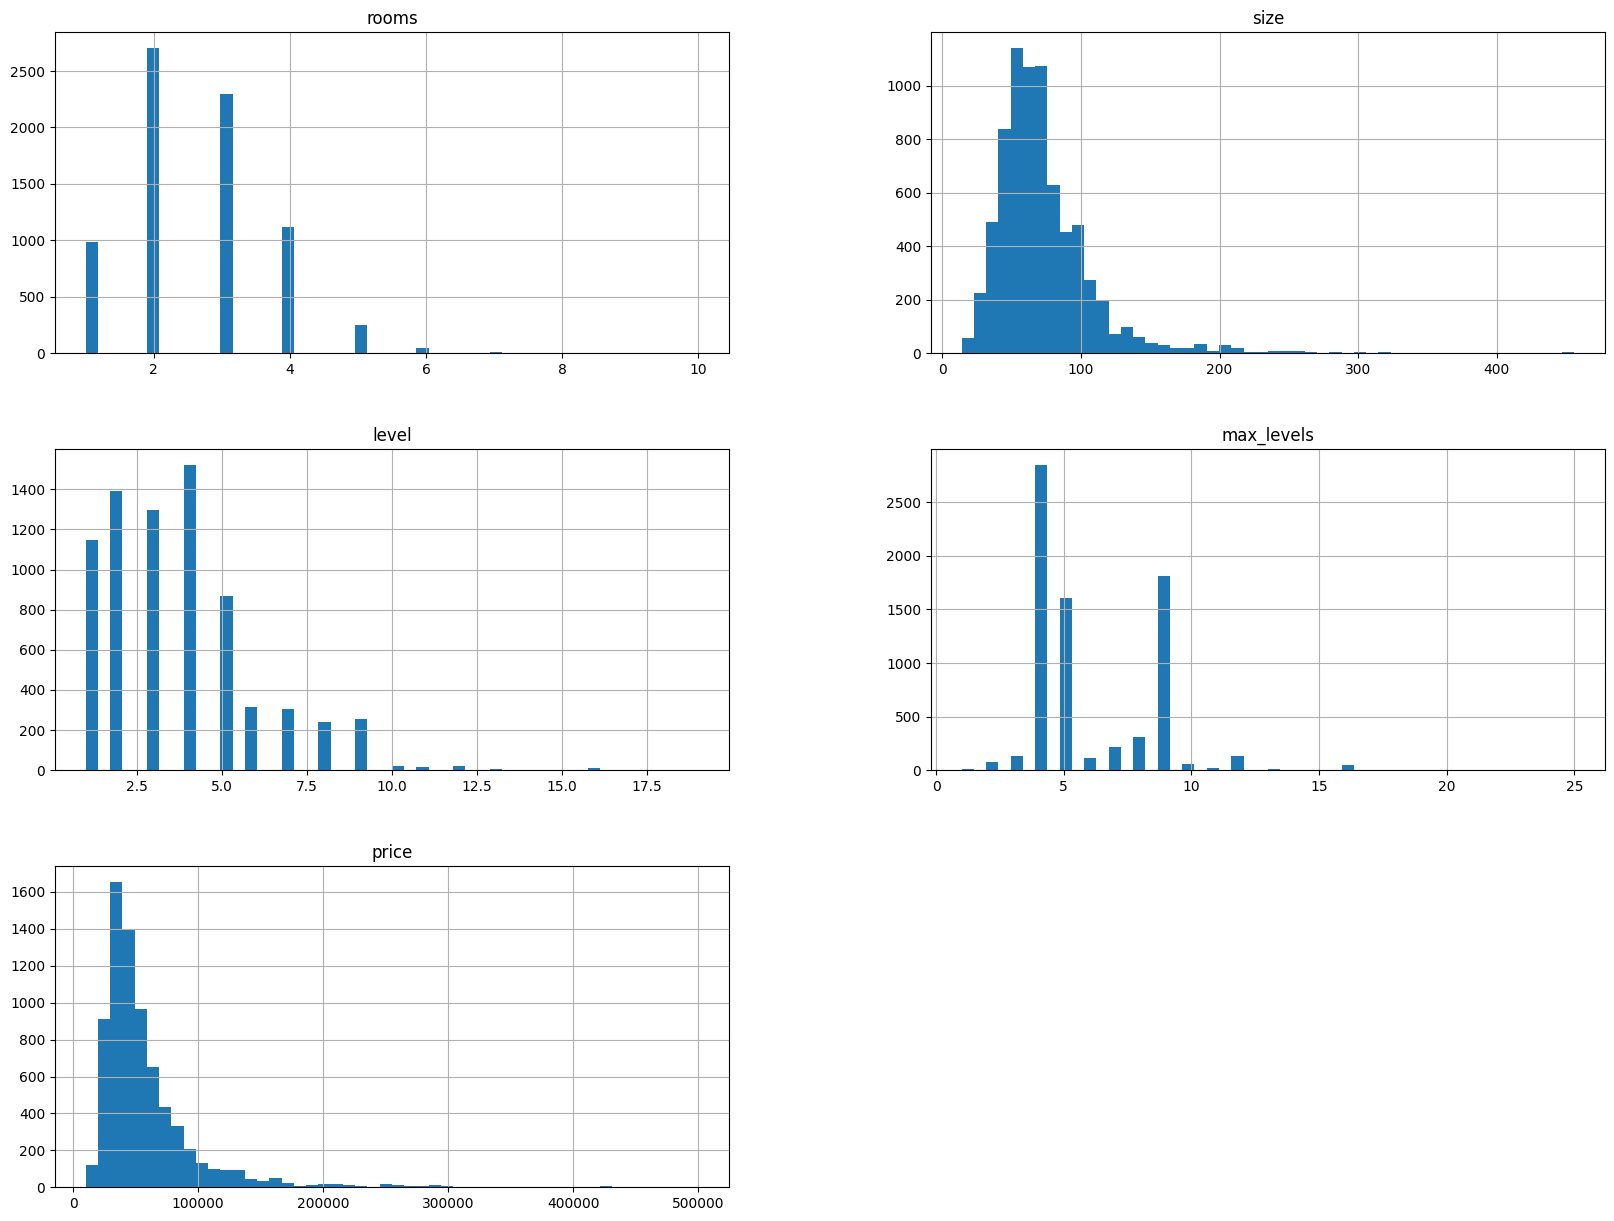

In [108]:
%matplotlib inline
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [109]:
df1['district'].value_counts()

district
Чиланзарский         1627
Мирзо-Улугбекский    1360
Юнусабадский          873
Учтепинский           870
Мирабадский           764
Яккасарайский         647
Яшнободский           462
Шайхантахурский       371
Олмазорский           264
Сергелийский          159
Янгихаётский           14
Бектемирский            8
Name: count, dtype: int64

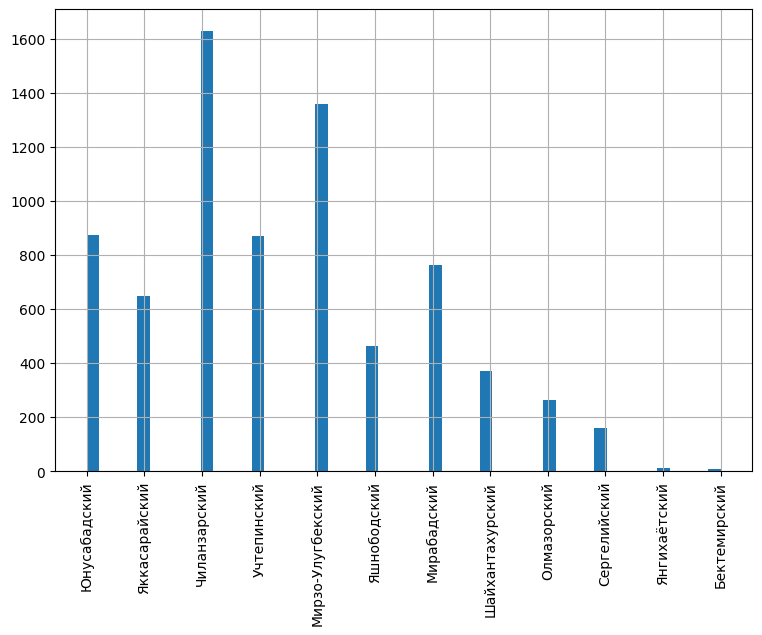

In [110]:
%matplotlib inline
df1['district'].hist(bins=50, figsize=(9,6))
plt.xticks(rotation=90)
plt.show()

`district` Toshkent sh. tumanlari bo'yicha ma'lumotlarimiz tarqoq, ayniqsa **Yangihayot** va **Bektemir** tumanlarida ma'lumotlar juda kam, bu ushbu tumanlardagi prognozga salbiy ta'sir qiladi. Qolaversa `train` va `test` qismlarida tumalar bo'yicha bir xil **proporsiyada** olishni belgilamasak, ma'lumotlarimiz kam bo'lgan tumanlar uchun **prognoz juda yomon chiqadi**, chunki barcha ma'lumotlar traininga o'tib qolishi mumkin. Shu boisdan Yangihayot va Bektemir tumanlarini qoldirgan holda, train va test qismlarida tumalar bo'yicha bir xil proporsiyada olishni belgilaymiz (lekin ma'lumotlar kamligi bois bu tumanlar uchun yaxshi prognozga ega bo'lolmaymiz).

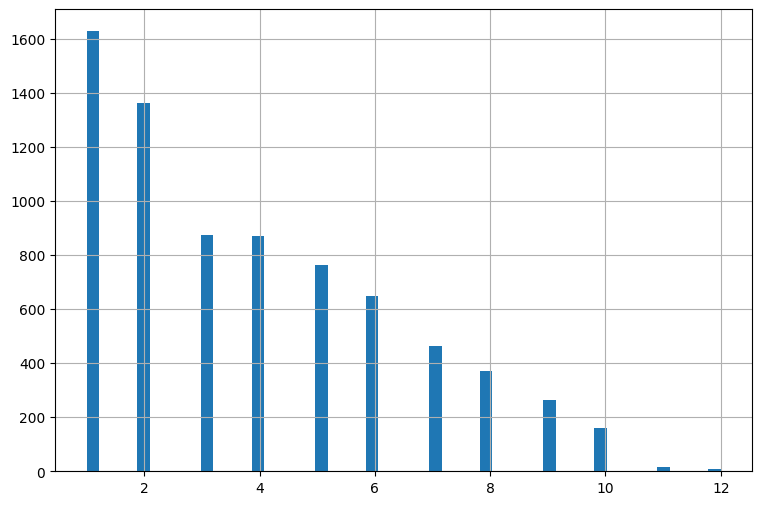

In [111]:
# Dastlab district ustunimizni sonli qiymat ko'rinishiga o'girib olamiz
dict = {'Чиланзарский':1, 'Мирзо-Улугбекский':2, 'Юнусабадский':3, 'Учтепинский':4, 'Мирабадский':5,
        'Яккасарайский':6, 'Яшнободский':7, 'Шайхантахурский':8, 'Олмазорский':9, 'Сергелийский':10,
        'Янгихаётский':11, 'Бектемирский':12 }
df1['district_num'] = df1['district'].map(dict)
df1['district_num'].hist(bins=50, figsize=(9,6))
plt.show()

`district`ni sonli ko'rinishga o'zgartirib oldik, endi **district** ustunini tashlab yuborib `district_num` ustunidan foydalanamiz.

In [112]:
df1_num = df1.drop('district', axis=1)
print(df1_num.info())
df1_num.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7419 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rooms         7419 non-null   int64  
 1   size          7419 non-null   float64
 2   level         7419 non-null   int64  
 3   max_levels    7419 non-null   int64  
 4   price         7419 non-null   float64
 5   district_num  7419 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 405.7 KB
None


,rooms,size,level,max_levels,price,district_num
0,3,57.0,4,4,52000.0,3
1,2,52.0,4,5,56000.0,6
2,2,42.0,4,4,37000.0,1
3,3,65.0,1,4,49500.0,1
4,3,70.0,3,5,55000.0,1


Bu ustunli qatorlar orasidagi korrelyatsiyani tekshiramiz

In [113]:
df1_num.corr()

,rooms,size,level,max_levels,price,district_num
rooms,1.000000,0.785668,0.140515,0.184824,0.566413,0.114573
size,0.785668,1.000000,0.162641,0.278893,0.797635,0.150251
level,0.140515,0.162641,1.000000,0.592910,0.062803,0.107708
max_levels,0.184824,0.278893,0.592910,1.000000,0.235023,0.179258
price,0.566413,0.797635,0.062803,0.235023,1.000000,0.096912
district_num,0.114573,0.150251,0.107708,0.179258,0.096912,1.000000


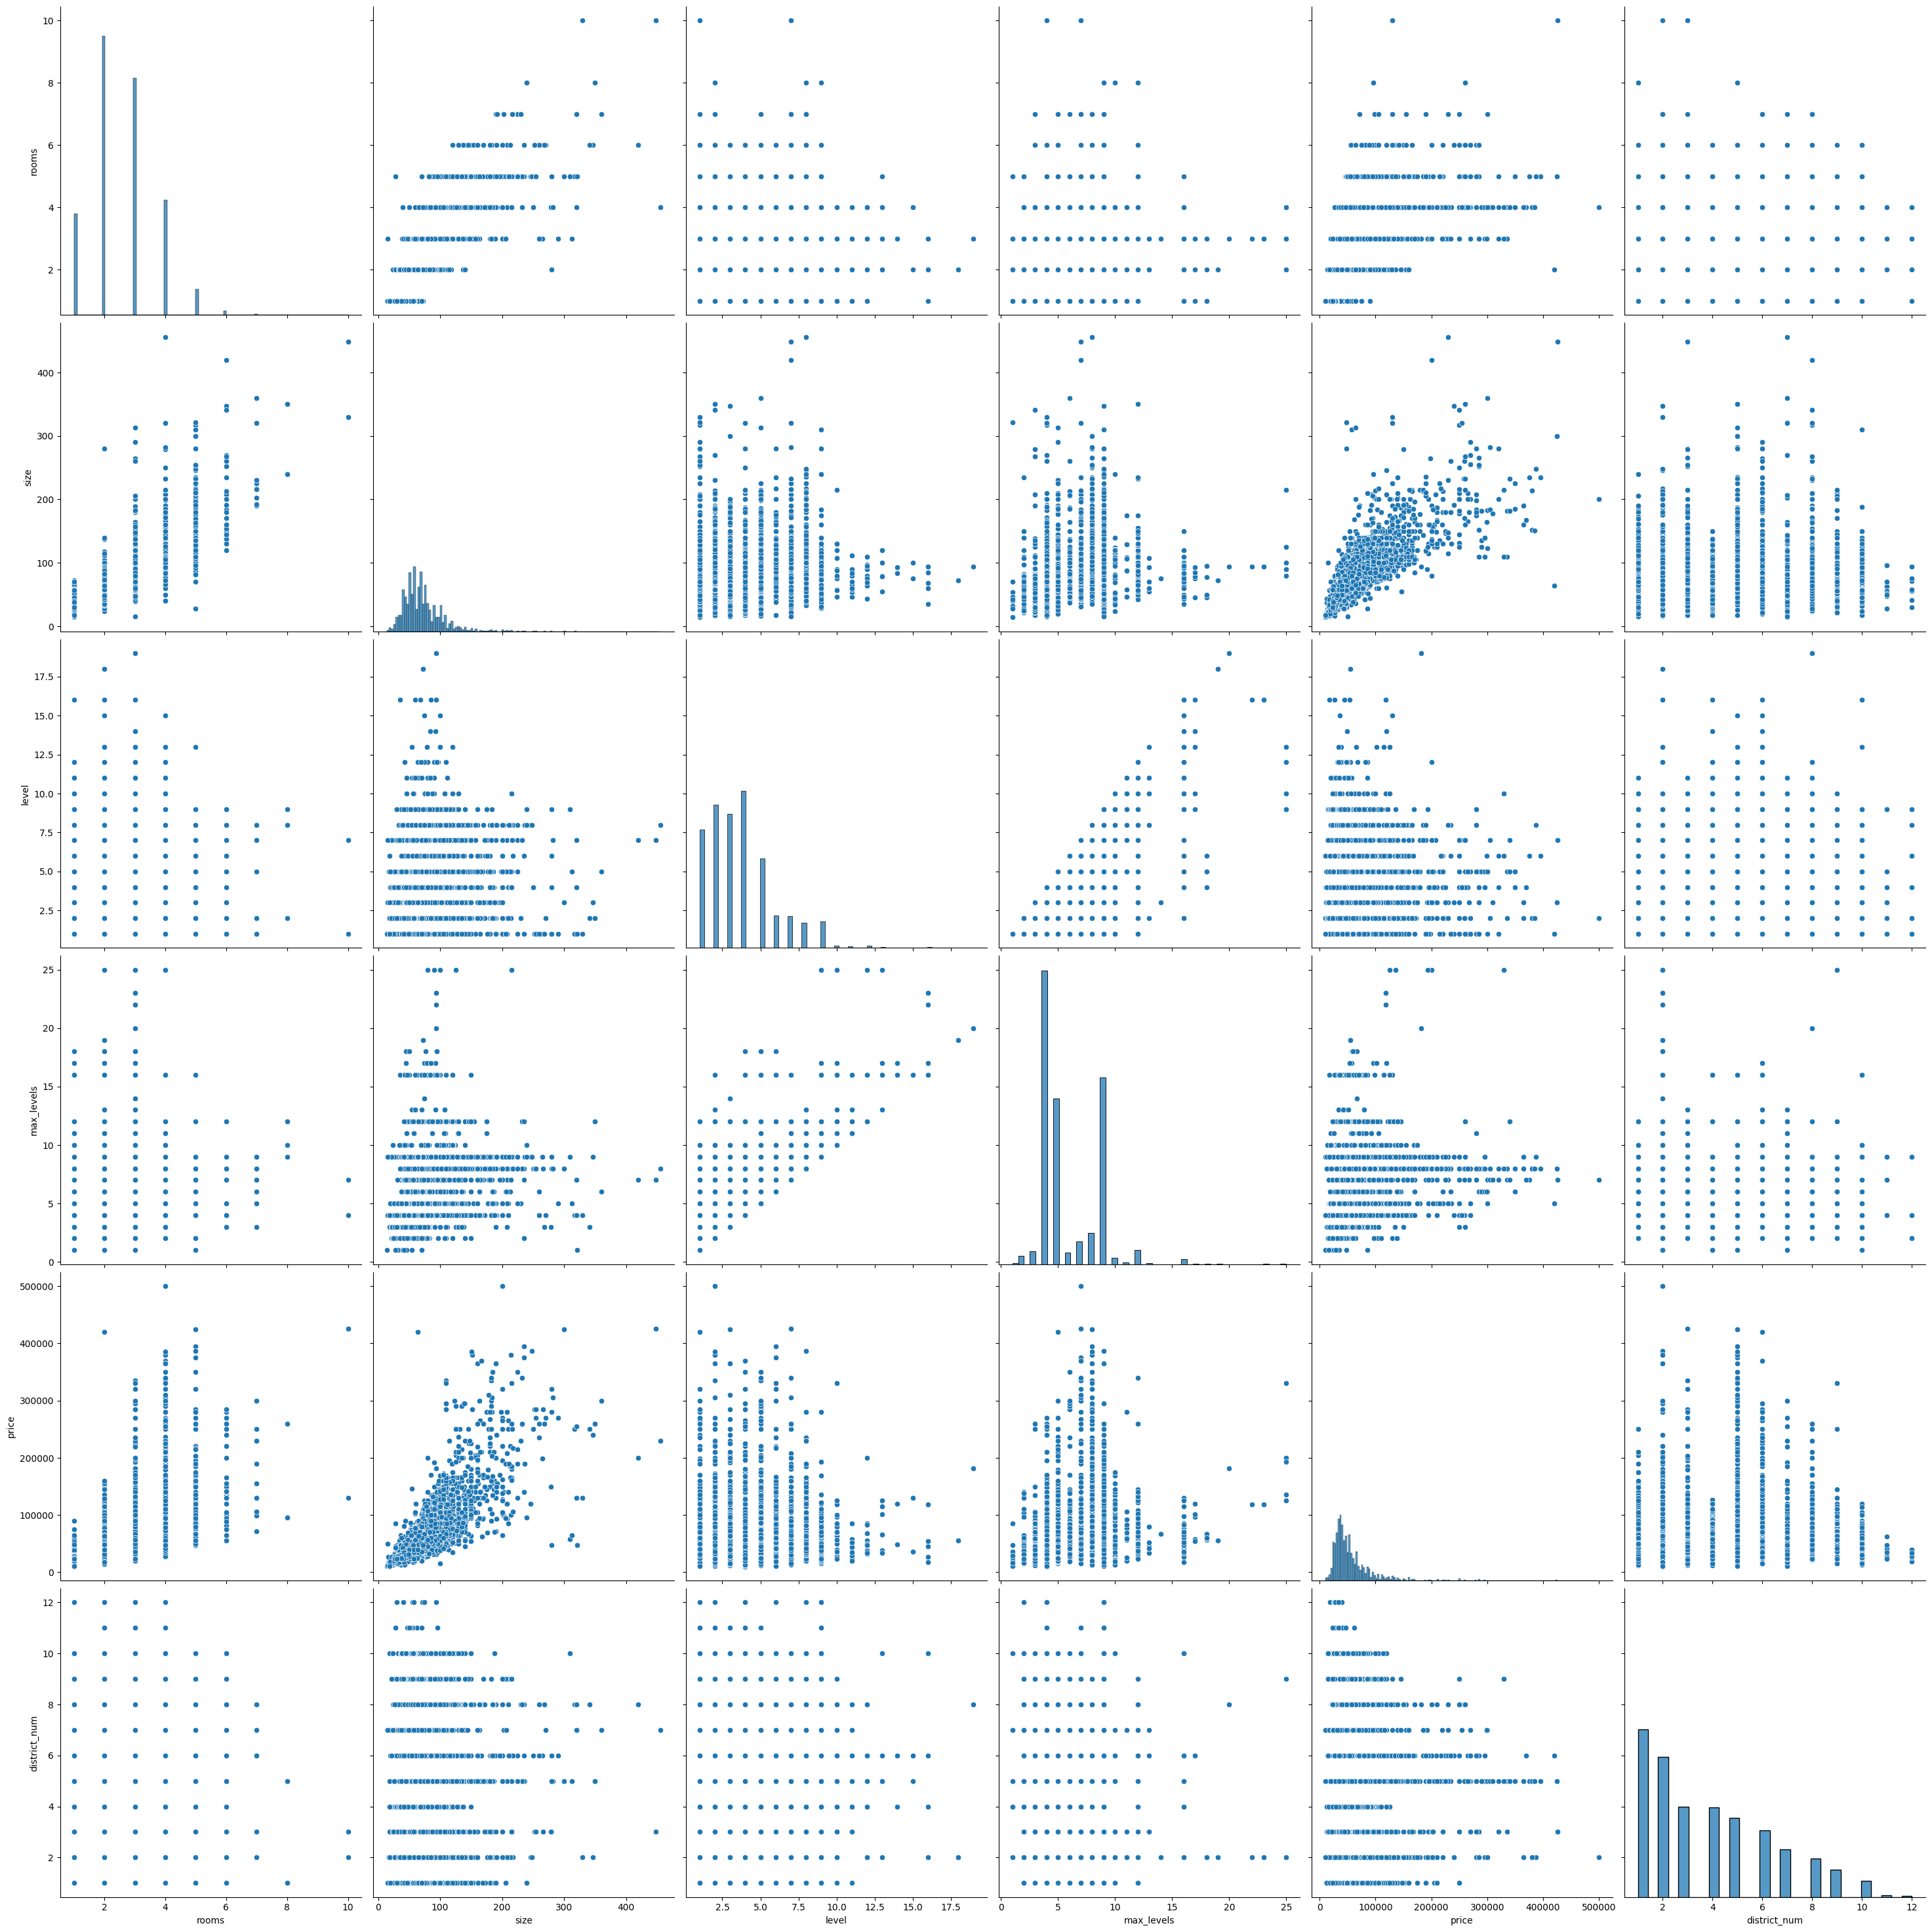

In [114]:
sns.pairplot(df1_num, height=5)
plt.show()

Barcha ustunlar orasida `price` va `size` o'rtasida korrelyatsiya eng kuchli ekan, keling uni alohida chizaylik.

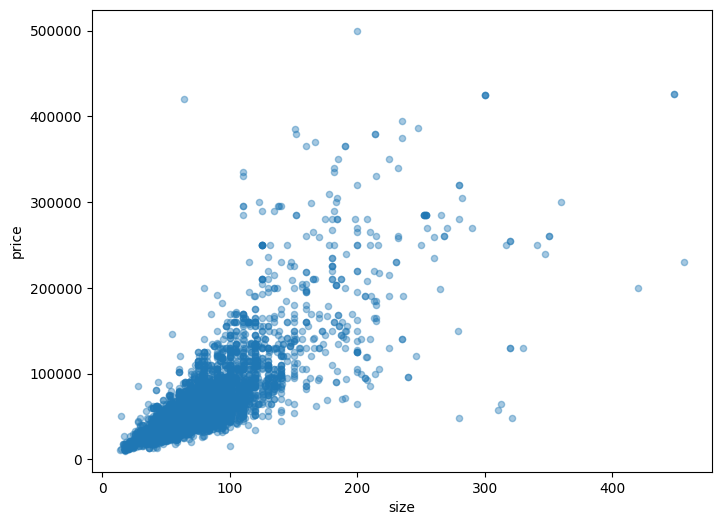

In [115]:
df1_num.plot(kind='scatter', x="size", y="price", alpha=0.4, figsize=(8,6))
plt.show()

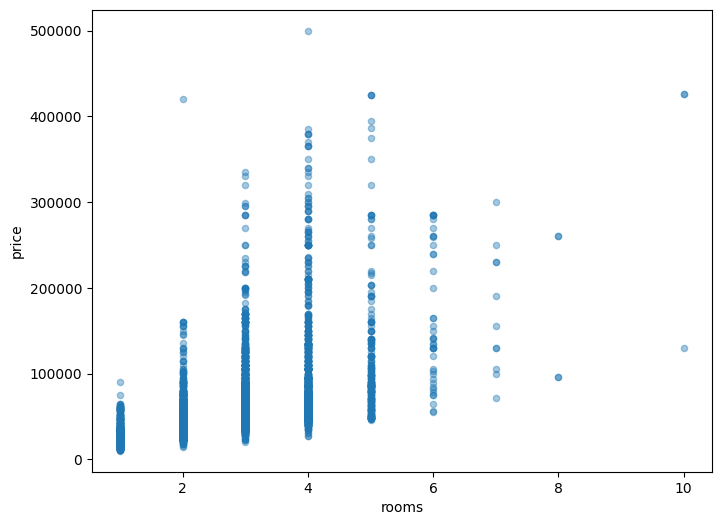

In [116]:
df1_num.plot(kind='scatter', x="rooms", y="price", alpha=0.4, figsize=(8,6))
plt.show()

In [163]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df1_num,df1_num['district_num']):
    train_set = df1_num.iloc[train_index]
    test_set = df1_num.iloc[test_index]

# train=train_set['district_num'].value_counts()
# test=test_set['district_num'].value_counts()
# pd.DataFrame({'train':train, 'test': test})
# train va test jadvallarimizda district_num mos ravishda proporsional taqsimlangan, endi ML ga o'tamiz
housing_price = train_set.drop("price", axis=1)
housing_price_labels = train_set["price"].copy()

`df_houses` jadvalimiz uchun jarayonlarni avtomatlashtiramiz.

In [221]:
df_houses = df1.drop('district_num', axis=1)
df_houses

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [222]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_houses, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop("district", axis=1)

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())
])

In [224]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [225]:
X_prepared = full_pipeline.fit_transform(X_train)

In [226]:
X_prepared[0:5,:]

array([[-0.57905384, -0.49576186, -1.21087209,  1.12469443,  8.        ],
       [ 1.27911568,  1.53329476,  0.13307365, -0.77638254,  3.        ],
       [ 0.35003092, -0.36049142,  0.13307365, -0.77638254,  2.        ],
       [ 2.20820045,  1.15453752, -0.31490826,  1.12469443,  9.        ],
       [ 1.27911568,  0.82988847, -0.76289017,  1.12469443,  4.        ]])

Ma'lumotlar ML uchun tayyor

>**`Linear Regression` ML algoritmi yordamida tekshirib ko'ramiz.**

---



In [227]:
# Prognoz uchun sklearn tarkibidagi LinearRegression klassini chaqiramiz
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression() # LinearRegression bu estimator. Estimatorlar ma'lumotlarni qabul qilib oladi va .fit() metodi yordamida ulardan basorat qilishni o'rganadi (machine learning)
# ML
LR_model.fit(X_prepared, y)

LinearRegression()

**TAMOM!** Machine Learning tugadi! Biz hozirgina kompyuterga uylarni narxini bashorat qilishni o'rgatdik.

Modelni qanday qilib tekshirib ko'rishimiz mumkin? Keling `df_housies` datasetdan birnecha qatorlarni modelga beramiz va chiqqan natijani bizdagi bor natija (label) bilan solishtiramiz.

In [228]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels
978,Мирабадский,4,120.0,9,10
362,Мирзо-Улугбекский,4,95.0,5,5
564,Мирзо-Улугбекский,2,62.0,4,4
5446,Мирзо-Улугбекский,3,75.0,5,9
1302,Мирзо-Улугбекский,2,55.0,5,5


In [229]:
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
test_label

978     119900.0
362      50000.0
564      38500.0
5446     41500.0
1302     35000.0
Name: price, dtype: float64

`test_data`ni pipelinedan o'tkazib, bizga kerak ko'rinishga keltirib olamiz.

In [230]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 1.27911568,  1.26275388,  2.37298321,  1.50490982,  1.        ],
       [ 1.27911568,  0.58640167,  0.58105556, -0.39616714,  2.        ],
       [-0.57905384, -0.30638324,  0.13307365, -0.77638254,  2.        ],
       [ 0.35003092,  0.04531991,  0.58105556,  1.12469443,  2.        ],
       [-0.57905384, -0.49576186,  0.58105556, -0.39616714,  2.        ]])

Endi esa prognoz (predict) qilib ko'ramiz:

In [231]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([97848.96450795, 72431.67544874, 49423.64264017, 61983.4285865 ,
       40990.33564374])

Yuoqirda ko'rib turganingiz bashorat qilingan qiymatlar. Xo'sh, ular real qiymatlardan qanday farq qiladi, solishtiramiz:

In [232]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
978,97848.964508,119900.0
362,72431.675449,50000.0
564,49423.642640,38500.0
5446,61983.428586,41500.0
1302,40990.335644,35000.0


 > **Modelni baholash**

---



Ko'rib turganingizdek, modelimiz qayerdadur kamroq, qayerdadur ko'proq xato bilan bashorat qilgan.

Lekin model aniqligini baxolash uchun 5 qator yetarli emas. Keling, avvalroq ajratib olgan `test_set` yordamida sinab ko'ramiz:

In [176]:
test_set

,district,rooms,size,level,max_levels,price
1198,Чиланзарский,2,50.0,2,4,30500.0
2849,Чиланзарский,3,93.0,7,9,50562.0
101,Чиланзарский,2,48.0,2,5,41500.0
5178,Яшнободский,2,71.0,7,9,42000.0
6583,Учтепинский,4,90.0,3,5,48000.0
...,...,...,...,...,...,...
6680,Мирзо-Улугбекский,2,60.5,7,7,30000.0
440,Чиланзарский,1,36.0,1,5,25500.0
763,Мирзо-Улугбекский,3,70.0,5,5,45500.0
2693,Учтепинский,4,100.0,8,9,58000.0


Avval predictor ustunlarni ajratib olaylik (`price`) dan boshqa barcha ustunlar:

In [177]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
1198,Чиланзарский,2,50.0,2,4
2849,Чиланзарский,3,93.0,7,9
101,Чиланзарский,2,48.0,2,5
5178,Яшнободский,2,71.0,7,9
6583,Учтепинский,4,90.0,3,5
...,...,...,...,...,...
6680,Мирзо-Улугбекский,2,60.5,7,7
440,Чиланзарский,1,36.0,1,5
763,Мирзо-Улугбекский,3,70.0,5,5
2693,Учтепинский,4,100.0,8,9


Label (`price`) ustunini ajratib olamiz.

In [178]:
y_test = test_set['price'].copy()
y_test

1198    30500.0
2849    50562.0
101     41500.0
5178    42000.0
6583    48000.0
         ...   
6680    30000.0
440     25500.0
763     45500.0
2693    58000.0
5408    25000.0
Name: price, Length: 1484, dtype: float64

`test_set` ni ham pipelinedan o'tkazamiz:

In [179]:
X_test_prepared = full_pipeline.transform(X_test)

Prognoz

In [180]:
y_predicted = LR_model.predict(X_test_prepared)

In [181]:
pd.DataFrame({'Prognoz':y_predicted, 'Real baxosi': y_test})

,Prognoz,Real baxosi
1198,37955.972023,30500.0
2849,73987.691043,50562.0
101,37119.678331,41500.0
5178,52408.492617,42000.0
6583,69245.228727,48000.0
...,...,...
6680,45129.116305,30000.0
440,32227.620911,25500.0
763,51325.006917,45500.0
2693,74234.575648,58000.0


Bashorat va real datani solishtirish uchun **Root mean square error** (`RMSE`) dan foydalanamiz:

In [182]:
from sklearn.metrics import mean_squared_error
rme = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
rmse = np.sqrt(rme)
print(rmse)

23534.27456901731


In [183]:
# Xatolikni foizda ko'ramiz
rmse/y_test.mean()*100

40.780609970107825

**Mean Absolute Error** (`MSE`) da tekshiramiz:

In [184]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predicted)
# MAE hisoblaymiz
print(mae)

14166.496833356327


In [185]:
# Xatolikni foizda ko'ramiz
mae/y_test.mean()*100

24.54795792874932

Demak, `LR_model` uchun `RMSE`=23534, `MAE`=14166 chiqdi. Yomon emas, lekin yaxshi ham emas. Ya'ni modelimiz uylarni baholashda o'rtacha `RMSE` bo'yicha 23534, `MAE` bo'yicha 14166 $ ga adashayapti.

Model aniqligini oshirish uchun yagona, universal yechim yo'q. Lekin aniqlikni oshirish uchun ko'rishimiz mumkin bo'lgan ishlar:

* Yaxhsiroq paramterlar topish
* Yaxhsiroq model (algoritm) tanlash
* Ko'proq ma'lumot yig'ish va hokazo.

Hozir boshqa modellarni bilan ham sinab ko'ramiz.

>**DecisionTree ML algoritmi**

---



In [186]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor()
DT_model.fit(X_prepared, y)

DecisionTreeRegressor()

Modelni tekshiramiz:

In [187]:
y_predicted = DT_model.predict(X_test_prepared)

In [188]:
# RMSE da baholaymiz
rme = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(rme)
print(rmse)

24037.60074220186


In [189]:
# Xatolikni foizda ko'ramiz
rmse/y_test.mean()*100

41.65278252406487

In [190]:
# MAE da baholaymiz
mae = mean_absolute_error(y_test, y_predicted)
print(mae)

11267.988106425895


In [191]:
# Xatolikni foizda ko'ramiz
mae/y_test.mean()*100

19.525370402575177

`DT_model` uchun `RMSE`=23666, `MAE`=11082 chiqdi. Avvalgidan katta farq qilmadi. Yomon emas, `MAE` ancha kamaydi, lekin yaxshi ham emas. Ya'ni modelimiz uylarni baholashda o'rtacha `RMSE` bo'yicha 23666, `MAE` bo'yicha 11082 $ ga adashayapti.

>**RandomForest ML algoritmi**

---



In [192]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

Modelni tekshiramiz:

In [193]:
y_predicted = RF_model.predict(X_test_prepared)

In [266]:
# RMSE da baholaymiz
rme = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(rme)
print(rmse)

19198.60339972635


In [195]:
# Xatolikni foizda ko'ramiz
rmse/y_test.mean()*100

33.26768177701763

In [196]:
# MAE da baholaymiz
mae = mean_absolute_error(y_test, y_predicted)
print(mae)

10122.353775046517


In [197]:
# Xatolikni foizda ko'ramiz
mae/y_test.mean()*100

17.54019483664319

Avvalgilardan ancha yaxshiroq. `RF_model` uchun `RMSE`=19439, `MAE`=10094 chiqdi. Yomon emas, `RMSE` va `MAE` ancha kamaydi, lekin bu ham hali yaxshi emas. Ya'ni modelimiz uylarni baholashda o'rtacha `RMSE` bo'yicha 19439, `MAE` bo'yicha 10094 $ ga adashayapti.

>**Cross-Validation ML algoritmi**

---



Yuqorida biz modelni baholash uchun ma'lumotlarni `test` va `train` setlarga ajratdik. Bu usulning kamchiligi biz **test** va **train** uchun doim bir xil ma'lumotlardan foydalanayapmiz.

`Cross-validation` yordamida biz ma'lumotlarni bir necha qismga ajratib, modelni turli qismlar yordamida bir necha bor `train` va `test` qilishimiz mumkin.

**! Cross validation uchun ma'lumotlarni train va testga bo'lish shart emas, buni sklearn o'zi qiladi.**

In [233]:
df_houses.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [234]:
X = df_houses.drop("price", axis=1)
y = df_houses["price"].copy()

X_prepared = full_pipeline.transform(X)

Validation natijalarini ko'rsatish uchun sodda funksiya yasab olamiz

In [235]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [236]:
# Cross-validation modelini chaqiramiz
from sklearn.model_selection import cross_val_score

Linear Regression ML

In [244]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_CV = np.sqrt(-scores)
display_scores(LR_rmse_CV)

Scores: [22088.62270985 18259.8398043  29557.74490332 27919.09838552
 29273.00453751 29869.88536712 28618.0138678  25500.8144551
 23469.7199304  16956.25158163]
Mean: 25151.29955425622
Std.dev: 4531.335035815879


In [245]:
# Xatolikni foizda ko'ramiz
LR_rmse_CV.mean()/y.mean()*100

42.898563739312294

Decision Tree ML

In [252]:
scores = cross_val_score(DT_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
DT_rmse_CV = np.sqrt(-scores)
display_scores(DT_rmse_CV)

Scores: [21745.86286833 25789.81354694 31229.68790558 30041.14066271
 29254.94853846 27047.54594814 29477.70547483 27698.25196379
 26397.23463231 16709.6531807 ]
Mean: 26539.18447218029
Std.dev: 4147.939157640391


In [253]:
# Xatolikni foizda ko'ramiz
DT_rmse_CV.mean()/y.mean()*100

45.26576824442983

Random Forest ML

In [257]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
RF_rmse_CV = np.sqrt(-scores)
display_scores(RF_rmse_CV)

Scores: [16574.77708207 16378.85598628 23573.78534927 24146.30215272
 23700.659918   22821.98266225 24727.38810076 21350.03624203
 19538.72521115 13901.51831024]
Mean: 20671.40310147643
Std.dev: 3654.2344951995624


In [259]:
# Xatolikni foizda ko'ramiz
RF_rmse_CV.mean()/y.mean()*100

35.257562004570076

Xulosa qilib aytadigan bo'lsak biz uchun (aynan shu prognoz uchun) `Random Forest` **modeli**dan yaratilgan `RF_model` afzal ekan. Chunki unda eng kichik xatolikka erishyabmiz.

`RF_model`ni joblib yordamida saqlab qo'yamiz.

In [267]:
import joblib

filename = 'RF_model.jbl' # faylga istalgan nom berishimiz mumkin.
joblib.dump(RF_model, filename)

['RF_model.jbl']

In [268]:
# Modelni o'qiymiz
RFmodel = joblib.load(filename)

In [269]:
# Modelni sinab ko'ramiz

scores = cross_val_score(RFmodel, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [16986.62237126 24022.43300078 23831.89890747 23432.07834826
 17371.1688223 ]
Mean: 21128.84029001468
Std.dev: 3233.02874604884


In [270]:
y_predicted = RFmodel.predict(X_test_prepared)

# RMSE da baholaymiz
rme = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(rme)
print(rmse)

19198.60339972635


In [271]:
# Xatolikni foizda ko'ramiz
print('Random Forest modeli uchun xatolik ', np.rint(rmse/y_test.mean()*100),'% ga teng')

Random Forest modeli uchun xatolik  33.0 % ga teng
